In [4]:
import numpy as np
def generate_time_series(batch_size,n_steps):
    freq1,freq2,offsets1,offsets2=np.random.rand(4,batch_size,1)
    time=np.linspace(0,1,n_steps)
    series=0.5*np.sin((time-offsets1)*(freq1*10+10))
    series+=0.2*np.sin((time-offsets2)*(freq2*20+20))
    series+=0.1*(np.random.rand(batch_size,n_steps)-0.5)
    return series[...,np.newaxis].astype(np.float32)

In [5]:
n_steps=50
series=generate_time_series(10000,n_steps+1)
X_train,y_train=series[:7000,:n_steps],series[:7000,-1]
X_valid,y_valid=series[7000:9000,:n_steps],series[7000:9000,-1]
X_test,y_test=series[9000:,:n_steps],series[9000,-1]

In [6]:
import tensorflow.keras as Keras
y_pred=X_valid[:,-1]
np.mean(Keras.losses.mean_squared_error(y_valid,y_pred))

0.0204668

In [7]:
import numpy as np

# This is our initial data; one entry per "sample"
# (in this toy example, a "sample" is just a sentence, but
# it could be an entire document).
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# First, build an index of all tokens in the data.
token_index = {}
for sample in samples:
	# We simply tokenize the samples via the `split` method.
	# in real life, we would also strip punctuation and special characters
	# from the samples.
	for word in sample.split():
		if word not in token_index:
			# Assign a unique index to each unique word
			token_index[word] = len(token_index) + 1
			# Note that we don't attribute index 0 to anything.
			
# Next, we vectorize our samples.
# We will only consider the first `max_length` words in each sample.
max_length = 10

# This is where we store our results:
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
	for j, word in list(enumerate(sample.split()))[:max_length]:
			index = token_index.get(word)
			results[i, j, index] = 1.

In [9]:
import string

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable # All printable ASCII characters.
token_index = dict(zip(range(1, len(characters) + 1), characters))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples):
	for j, character in enumerate(sample):
		index = token_index.get(character)
		results[i, j, index] = 1.


In [8]:
from tensorflow.keras.preprocessing.text import Tokenizer

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

tokenizer = Tokenizer(num_words=1000)

#tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

print(one_hot_results)


Found 0 unique tokens.
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We will store our words as vectors of size 1000.
# Note that if you have close to 1000 words (or more)
# you will start seeing many hash collisions, which
# will decrease the accuracy of this encoding method.
dimensionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
	for j, word in list(enumerate(sample.split()))[:max_length]:
		# Hash the word into a "random" integer index
		# that is between 0 and 1000
		index = abs(hash(word)) % dimensionality
		results[i, j, index] = 1.


In [31]:
from tensorflow.keras.layers import Embedding

from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

# 作为特征的单词个数
max_features = 10000
# 超出的单词会被截断
# (这些单词是最常见单词)
maxlen = 20

# 加载数据，整数列表
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


In [32]:

# 将整数列表转换为(samples, maxlen)的2D张量
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
# 指定Embedding层的最大输入长度，以便后面将嵌入输入展平。

model.add(Embedding(max_features, 8, input_length=maxlen))
# Embedding层激活的形状为(samples, maxlen, 8)

# 将3D的嵌入张量展平成形状(samples, maxlen * 8)的2D张量
model.add(Flatten())

# 添加分类器
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# model.summary()

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 2s 2ms/step - loss: 0.6648 - acc: 0.6342 - val_loss: 0.6067 - val_acc: 0.7050
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5320 - acc: 0.7562 - val_loss: 0.5192 - val_acc: 0.7348
Epoch 3/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4563 - acc: 0.7894 - val_loss: 0.4971 - val_acc: 0.7468
Epoch 4/10
625/625 [==============================] - 1s 2ms/step - loss: 0.4194 - acc: 0.8105 - val_loss: 0.4917 - val_acc: 0.7544
Epoch 5/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3933 - acc: 0.8263 - val_loss: 0.4931 - val_acc: 0.7574
Epoch 6/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3721 - acc: 0.8360 - val_loss: 0.4963 - val_acc: 0.7596
Epoch 7/10
625/625 [==============================] - 1s 2ms/step - loss: 0.3529 - acc: 0.8468 - val_loss: 0.5022 - val_acc: 0.7572
Epoch 8/10
625/625 [==============================] - 1s 2ms/step - loss: 0.

In [36]:

print(x_train)


[[  65   16   38 ...   19  178   32]
 [  23    4 1690 ...   16  145   95]
 [1352   13  191 ...    7  129  113]
 ...
 [  11 1818 7561 ...    4 3586    2]
 [  92  401  728 ...   12    9   23]
 [ 764   40    4 ...  204  131    9]]


In [19]:
import os
# -*- coding: UTF-8 -*-
imdb_dir = r'C:\Users\ASUS\Downloads\aclImdb\aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),errors='ignore')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100  # We will cut reviews after 100 words
training_samples = 200  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Found 88583 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [37]:
glove_dir = 'D:\迅雷下载\glove.6B'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),errors='ignore')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector


Found 399913 word vectors.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 125ms/step - loss: 1.1167 - acc: 0.5050 - val_loss: 0.6930 - val_acc: 0.5063
Epoch 2/10
7/7 [==============================] - 1s 105ms/step - loss: 0.6793 - acc: 0.5500 - val_loss: 0.6902 

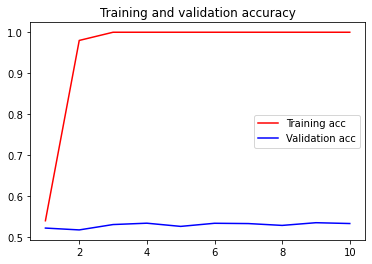

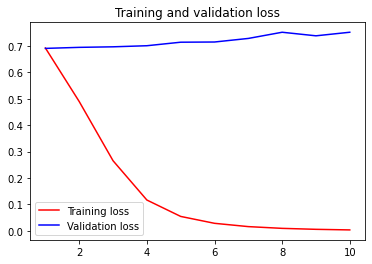

In [27]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_4 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 1s 144ms/step - loss: 0.6920 - acc: 0.5400 - val_loss: 0.6907 - val_acc: 0.5221
Epoch 2/10
7/7 [==============================] - 1s 106ms/step - loss: 0.4893 - acc: 0.9800 - val_loss: 0.6946 

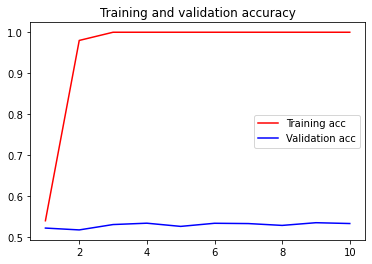

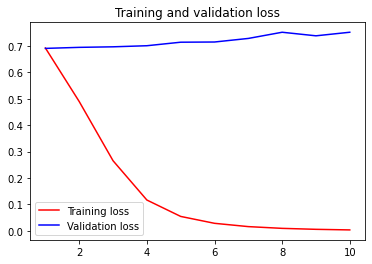

782/782 [==============================] - 2s 2ms/step - loss: 0.7730 - acc: 0.5706


[0.7729786038398743, 0.5705999732017517]

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in sorted(os.listdir(dir_name)):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname),errors='ignore')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)


model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)